# 朴素贝叶斯法

朴素贝叶斯（naive Bayes）法是基于贝叶斯定理与特征条件独立假设的分类方法。对于给定的数据集，基于特征独立性假设，首先求出各个类别的先验概率$P(Y=c_k)$以及该特征在不同类别下的条件概率$P(X=x|Y=c_k)$，然后根据两者求得该特征在不同类别下的后验概率$P(Y=c_k|X=x)$，后验概率最大的那一类即为贝叶斯分类给出的结果。

对于此方法的理解可以参考：[数学之美番外篇：平凡而又神奇的贝叶斯方法](http://mindhacks.cn/2008/09/21/the-magical-bayesian-method/)

下面只给出具体算法，

#### 算法：（朴素贝叶斯算法）

输入：训练数据 $T=\{(x_1,y_1),(x_2,y_2),\ldots,(x_N,y_N)\}$，其中 $x_i=(x_i^{(1)},x_i^{(2)},\ldots,x_i^{(n)})^T$，$x_i^{(j)}$ 是第 $i$ 个样本的第 $j$ 个特征，$x_i^{(j)}\in \{a_{j1},a_{j2},\ldots,a_{jS_j}\}$，$a_{jl}$ 是第 $j$ 个特征可能取的第 $l$ 个值，$j=1,2,\ldots,n$，$l=1,2,\dots,S_j$，$y_i\in \{c_1,c_2,\ldots,c_k\}$；实例 $x$；

输出：实例 $x$ 的分类。

（1）计算先验概率及条件概率
$$P(Y=c_k)=\frac{\sum_{i=1}^N I(y_i=c_k)}{N},\quad k=1,2,\ldots,K$$
$$P(X^{(j)}=a_{jl}|Y=c_k)=\frac{\sum_{i=1}^N I(x_i^{(j)}=a_{jl},y_i=c_k)}{\sum_{i=1}^N I(y_i=c_k)}$$
$$j=1,2,\ldots,n;\quad l=1,2,\ldots,S_j;\quad k=1,2,\ldots,K$$

(2)对于给定的实例 $x=(x^{(1)},x^{(2)},\ldots,x^{(n)})^T$，计算
$$P(Y=c_k)\prod_{j=1}^n P(X^{(j)}=x^{(j)}|Y=c_k),\quad k=1,2,\ldots,K$$

(3)确定实例 $x$ 的类
$$y=\arg \max_{c_k}P(Y=c_k)\prod_{j=1}^n P(X^{(j)}=x^{(j)}|Y=c_k)$$

#### 贝叶斯估计：

用以上算法可能会出现估计的概率为0的情况。这样会导致后验概率的值为0，使得分类难以实现。解决该问题的一个方法是采用贝叶斯估计。具体地，条件概率的贝叶斯估计是

$$P(X^{(j)}=a_{jl}|Y=c_k)=\frac{\sum_{i=1}^N I(x_i^{(j)}=a_{jl},y_i=c_k)+\lambda}{\sum_{i=1}^N I(y_i=c_k)+S_j \lambda}$$

式中 $\lambda\geq 0$

下面采用朴素贝叶斯对`mnist`数据进行分类。首先导入必要的包：

In [1]:
from mnist import MNIST
import numpy as np
import matplotlib.pyplot as plt

读取数据

In [2]:
mndata = MNIST('.\mnist')
imdata, imlab = mndata.load_training()
tsdata, tslab = mndata.load_testing()

imdata_ar = np.array(imdata)
imlab_ar = np.array(imlab)
tsdata_ar = np.array(tsdata)

对数据预处理（二值化）：

In [3]:
imdata2=[]
for i in range(len(imdata)):
    imdata2.append([])
    for j in imdata[i]:
        if j > 50:
            imdata2[i].append(1)
        else:
            imdata2[i].append(0)
imdata2_ar = np.array(imdata2)

查看二值化的效果

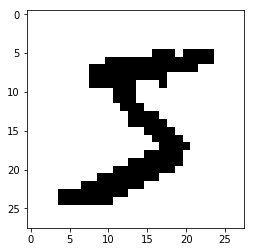

In [4]:
im0=np.array(imdata2_ar[0]).reshape(28,28)
fig = plt.figure()    
plt.imshow(im0,cmap = 'binary')#黑白显示    
plt.show() 

求先验概率，这里的先验概率实际上并不采用，而是采用样本数量代替，原因是 Python 对于浮点数运算是不精确的，而我们的数据高达 28*28=784 维，计算条件概率时，有784个小于1的浮点数相乘，这样的结果是趋于 0 的，在 Python 中会出现几乎所有条件概率都为0的情况。为了解决这个问题，一个自然的想法是将浮点数运算变为整数运算，因此，这里采用将条件概率扩大 10000 倍并取整数的方法。由于这是个非常大的整数，先验概率就不得不也采取整数的形式了。

In [5]:
N = len(imdata) 
Py = [] #先验概率
count = []
for i in range(10):
    count.append(imlab.count(i))
    Py.append(count[i] / N)
count = list(map(int, count))

将样本分类：

In [6]:
#将样本按 0-9 排序,并转化为list结构
imdata2_list = imdata2_ar[imlab_ar.argsort()].tolist()
imlab_list = imlab_ar[imlab_ar.argsort()].tolist()

split_list = [] #分割列表
imdata2_split = [] #分割后的样本
split_list.append(count[0]) 
imdata2_split.append([imdata2_list[:split_list[0]]])
for i in range(1,10):
    split_list.append(split_list[-1] + count[i]) #分割列表split_list[i]=sum(count[:i])
    imdata2_split.append([imdata2_list[split_list[i-1]:split_list[i]]]) #分割后的样本imdata_split[i][0]为数字i的所有样本集合

观察imdata2_split的形状，以便于索引

In [7]:
imdata2_split[0][0] == imdata2_list[:count[0]]

True

In [8]:
imdata2_split[0][0][1] ==imdata2_list[1]

True

In [9]:
imdata2_split[1][0][1] ==imdata2_list[split_list[0]+1]

True

将测试数据也进行相应的转换

In [10]:
tsdata2 = []
for i in range(len(tsdata)):
    tsdata2.append([])
    for j in tsdata[i]:
        if j > 50:
            tsdata2[i].append(1)
        else:
            tsdata2[i].append(0)
            

求条件概率，这里由于mnist数据集图片的维数为28*28=784，太大，直接采用概率计算会导致结果均为0的情况发生，故采用概率值乘以10000并取整数的方式

In [11]:
#统计所有样本中，各个维数的值为0的数量和1的数量
Px0y, Px1y = [], []
for i in range(10):
    Px0y.append([])
    Px1y.append([])
    for j in range(28*28):
        count0 = list(map(lambda x: x[j], imdata2_split[i][0])).count(0)
        count1 = count[i]-count0
        Px0y[i].append(int(10000*(count0+1) / (count[i]+2)))
        Px1y[i].append(int(10000*(count1+1) / (count[i]+2)))

计算先验概率和条件概率的积，这里的“先验概率”取其乘以样本总数后的值，也即样本的数量

In [12]:
from Process import *

max_steps = len(tsdata2)
process_bar = ShowProcess(max_steps)

right = []
for k in range(len(tsdata2)):
    X = tsdata[k]
    result = []
    for i in range(10):
        mul = 1
        for j in range(len(X)):
            if X[j] == 0:
                mul = mul * Px0y[i][j]
            else:
                mul = mul * Px1y[i][j]
        result.append(mul*count[i])
        
    if result.index(max(result)) == tslab[k]:
        right.append(1)
    else:
        right.append(0)
    
    process_bar.show_process() 
    
process_bar.close('done') 

 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>]100.00%
done


给出正确率

In [13]:
right.count(1) / len(right)

0.8407